## Maze

In the following notebook a practicall example will be perfomed using MDP.py to solve it

In [1]:
import numpy as np
import MDP
import matplotlib.pyplot as plt

In [2]:
# Construct a simple maze MDP

#  Grid world layout:

#  ---------------------
#  |  0 |  1 |  2 |  3 |
#  ---------------------
#  |  4 |  5 |  6 |  7 |
#  ---------------------
#  |  8 |  9 | 10 | 11 |
#  ---------------------
#  | 12 | 13 | 14 | 15 |
#  ---------------------

#  Goal state: 14 
#  Bad state: 9
#  End state: 16

#  The end state is an absorbing state that the agent transitions 
#  to after visiting the goal state.

#  There are 17 states in total (including the end state) 
#  and 4 actions (up, down, left, right).

In [3]:
# Transition function: |A| x |S| x |S'| array
T = np.zeros([4,17,17])
a = 0.8;  # intended move
b = 0.1;  # lateral move

# up (a = 0)

T[0,0,0] = a+b;
T[0,0,1] = b;

T[0,1,0] = b;
T[0,1,1] = a;
T[0,1,2] = b;

T[0,2,1] = b;
T[0,2,2] = a;
T[0,2,3] = b;

T[0,3,2] = b;
T[0,3,3] = a+b;

T[0,4,4] = b;
T[0,4,0] = a;
T[0,4,5] = b;

T[0,5,4] = b;
T[0,5,1] = a;
T[0,5,6] = b;

T[0,6,5] = b;
T[0,6,2] = a;
T[0,6,7] = b;

T[0,7,6] = b;
T[0,7,3] = a;
T[0,7,7] = b;

T[0,8,8] = b;
T[0,8,4] = a;
T[0,8,9] = b;

T[0,9,8] = b;
T[0,9,5] = a;
T[0,9,10] = b;

T[0,10,9] = b;
T[0,10,6] = a;
T[0,10,11] = b;

T[0,11,10] = b;
T[0,11,7] = a;
T[0,11,11] = b;

T[0,12,12] = b;
T[0,12,8] = a;
T[0,12,13] = b;

T[0,13,12] = b;
T[0,13,9] = a;
T[0,13,14] = b;

T[0,14,16] = 1;

T[0,15,11] = a;
T[0,15,14] = b;
T[0,15,15] = b;

T[0,16,16] = 1;

# down (a = 1)

T[1,0,0] = b;
T[1,0,4] = a;
T[1,0,1] = b;

T[1,1,0] = b;
T[1,1,5] = a;
T[1,1,2] = b;

T[1,2,1] = b;
T[1,2,6] = a;
T[1,2,3] = b;

T[1,3,2] = b;
T[1,3,7] = a;
T[1,3,3] = b;

T[1,4,4] = b;
T[1,4,8] = a;
T[1,4,5] = b;

T[1,5,4] = b;
T[1,5,9] = a;
T[1,5,6] = b;

T[1,6,5] = b;
T[1,6,10] = a;
T[1,6,7] = b;

T[1,7,6] = b;
T[1,7,11] = a;
T[1,7,7] = b;

T[1,8,8] = b;
T[1,8,12] = a;
T[1,8,9] = b;

T[1,9,8] = b;
T[1,9,13] = a;
T[1,9,10] = b;

T[1,10,9] = b;
T[1,10,14] = a;
T[1,10,11] = b;

T[1,11,10] = b;
T[1,11,15] = a;
T[1,11,11] = b;

T[1,12,12] = a+b;
T[1,12,13] = b;

T[1,13,12] = b;
T[1,13,13] = a;
T[1,13,14] = b;

T[1,14,16] = 1;

T[1,15,14] = b;
T[1,15,15] = a+b;

T[1,16,16] = 1;

# left (a = 2)

T[2,0,0] = a+b;
T[2,0,4] = b;

T[2,1,1] = b;
T[2,1,0] = a;
T[2,1,5] = b;

T[2,2,2] = b;
T[2,2,1] = a;
T[2,2,6] = b;

T[2,3,3] = b;
T[2,3,2] = a;
T[2,3,7] = b;

T[2,4,0] = b;
T[2,4,4] = a;
T[2,4,8] = b;

T[2,5,1] = b;
T[2,5,4] = a;
T[2,5,9] = b;

T[2,6,2] = b;
T[2,6,5] = a;
T[2,6,10] = b;

T[2,7,3] = b;
T[2,7,6] = a;
T[2,7,11] = b;

T[2,8,4] = b;
T[2,8,8] = a;
T[2,8,12] = b;

T[2,9,5] = b;
T[2,9,8] = a;
T[2,9,13] = b;

T[2,10,6] = b;
T[2,10,9] = a;
T[2,10,14] = b;

T[2,11,7] = b;
T[2,11,10] = a;
T[2,11,15] = b;

T[2,12,8] = b;
T[2,12,12] = a+b;

T[2,13,9] = b;
T[2,13,12] = a;
T[2,13,13] = b;

T[2,14,16] = 1;

T[2,15,11] = a;
T[2,15,14] = b;
T[2,15,15] = b;

T[2,16,16] = 1;

# right (a = 3)

T[3,0,0] = b;
T[3,0,1] = a;
T[3,0,4] = b;

T[3,1,1] = b;
T[3,1,2] = a;
T[3,1,5] = b;

T[3,2,2] = b;
T[3,2,3] = a;
T[3,2,6] = b;

T[3,3,3] = a+b;
T[3,3,7] = b;

T[3,4,0] = b;
T[3,4,5] = a;
T[3,4,8] = b;

T[3,5,1] = b;
T[3,5,6] = a;
T[3,5,9] = b;

T[3,6,2] = b;
T[3,6,7] = a;
T[3,6,10] = b;

T[3,7,3] = b;
T[3,7,7] = a;
T[3,7,11] = b;

T[3,8,4] = b;
T[3,8,9] = a;
T[3,8,12] = b;

T[3,9,5] = b;
T[3,9,10] = a;
T[3,9,13] = b;

T[3,10,6] = b;
T[3,10,11] = a;
T[3,10,14] = b;

T[3,11,7] = b;
T[3,11,11] = a;
T[3,11,15] = b;

T[3,12,8] = b;
T[3,12,13] = a;
T[3,12,12] = b;

T[3,13,9] = b;
T[3,13,14] = a;
T[3,13,13] = b;

T[3,14,16] = 1;

T[3,15,11] = b;
T[3,15,15] = a+b;

T[3,16,16] = 1;

# Reward function: |A| x |S| array
R = -1 * np.ones([4,17]);

# set rewards
R[:,14] = 100;  # goal state
R[:,9] = -70;   # bad state
R[:,16] = 0;    # end state

# Discount factor: scalar in [0,1)
discount = 0.95
        
# MDP object
mdp = MDP.MDP(T,R,discount)

1. Report the policy, value function and number of iterations needed by value iteration when using a tolerance of 0.01 and starting from a value function set to 0 for all states. [1 point]

In [4]:
initialV = np.zeros(mdp.nStates)
[V,nIterations,epsilon] = mdp.valueIteration(initialV,tolerance=0.01)
policy = mdp.extractPolicy(V)

In [5]:
policy, V, nIterations

(array([3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 3, 0, 0, 0], dtype=int64),
 array([ 57.40981959,  62.35501737,  67.77963975,  64.96284383,
         58.62088109,  62.31802989,  74.58594186,  70.20153227,
         63.3314941 ,   7.47046958,  82.89054368,  75.58836359,
         75.79654065,  83.65711283, 100.        ,  72.869372  ,
          0.        ]),
 20)

2. Report the policy, value function and number of iterations needed by policy iteration to find an optimal policy when starting from the policy that chooses action 0 in all states. [1 point]

In [6]:
initialP = np.zeros(mdp.nStates,dtype=int)
[policy,V,nIterations] = mdp.policyIteration(initialP)

policy, V, nIterations

(array([3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 3, 0, 0, 0], dtype=int64),
 array([ 57.41579164,  62.35823345,  67.78138742,  64.96471086,
         58.62141068,  62.31944032,  74.58645751,  70.2024099 ,
         63.33161821,   7.47053089,  82.89063387,  75.58877302,
         75.79659742,  83.65712755, 100.        ,  72.87012982,
          0.        ]),
 4)

3. Report the number of iterations needed by modified policy iteration to converge when varying the number of iterations in partial policy evaluation from 1 to 10. Use a tolerance of 0.01, start with the policy that chooses action 0 in all states and start with the value function that assigns 0 to all states. [1 point] Discuss the impact of the number of iterations in partial policy evaluation on the results and relate the results to value iteration and policy iteration. [1 point]

In [7]:
iters = np.zeros(10)
for i in range(1, 11):
    [policy,V,nIterations,epsilon] = mdp.modifiedPolicyIteration(initialP,initialV, tolerance=0.01, nEvalIterations=i)
    iters[i-1] = nIterations


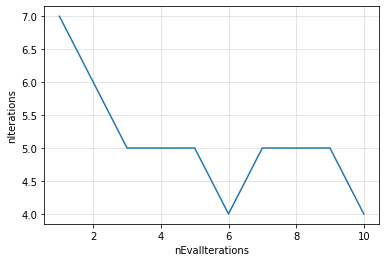

In [8]:
plt.plot(np.arange(1,11,1), iters)
plt.xlabel("nEvalIterations")
plt.ylabel("nIterations")
plt.grid(alpha=0.4)

Observations:
- A small number of iterations in the partial policy evaluation, makes the modifiedPolicyIteration to behave like a value iterator with the advantage of having an initial policy. In this case the value iteration algorithm in the modifiedPolicyIteration is more exploited and used to make the model converge.
- A big number of iterations in the partial policy evaluation, levels out the previously mentioned behaviour and enables the policy to be properly evaluated